<a href="https://colab.research.google.com/github/Edson-Litsur/Data_data_analysis_projects/blob/main/Data_Analysis_A/B_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data from CSV
df_ab_test = pd.read_csv('/content/sample_data/ab_test_click_data (1).csv')

In [ ]:
#Display the first few rows of the DataFrame to confirme it's loaded correctly
print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.info())
print(df_ab_test.groupby('group').sum('click'))


   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB
None
         user_id  click
g

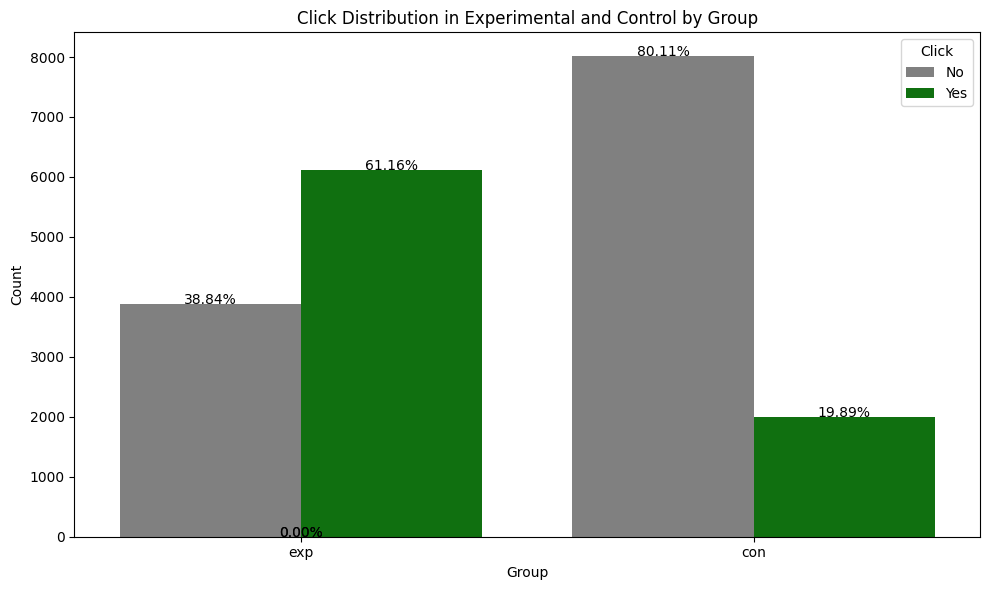

In [ ]:
#Customer pallete for kely green and french Navy
palette = {0:'gray', 1:'green'}

#Plotting the click distribution for each group with the customer colors
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group', hue='click', data=df_ab_test, palette=palette)
plt.title('Click Distribution in Experimental and Control by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click', labels=['No','Yes'])

#Calculating the percentage and anotating the bars
group_counts = df_ab_test.groupby(['group']).size() #Count the groups
group_click_counts = df_ab_test.groupby(['group','click']).size().reset_index(name='count') #count the click per group

for p in ax.patches:
  height=p.get_height()
  #Find the group and click type for the current bar
  group= 'exp' if p.get_x() < 0.5 else 'con'
  click = 1 if p.get_x() % 1> 0.5 else 0
  total = group_counts.loc[group]
  percentage =  100 * height / total
  ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#Parameters of the model drom power Analysis

alpha = 0.05
print("Alpha: significance level is :", alpha)

delta = 0.1
print("Delta: minimum detectable effect is:", delta)

Alpha: significance level is : 0.05
Delta: minimum detectable effect is: 0.1


**Calculating total numbers of Clicks per group by summing  clicks**

In [ ]:
#Calculating total numbers of Clicks per group by summing  clicks
X_con = df_ab_test.groupby('group')['click'].sum()['con']
X_exp = df_ab_test.groupby('group')['click'].sum()['exp']

#Calculate the numbers of users per group
N_con = df_ab_test.groupby('group')['user_id'].count()['con']
N_exp = df_ab_test.groupby('group')['user_id'].count()['exp']

#printing this for visibility
print(df_ab_test.groupby('group')['click'].sum())
print("Total numbers of users in Control: ", N_con)
print("Total numbers of users in Experimnental: ", N_exp)
print("Total clicks in control group:", X_con)
print("Total clicks in experiment group:", X_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Total numbers of users in Control:  10000
Total numbers of users in Experimnental:  10000
Total clicks in control group: 1989
Total clicks in experiment group: 6116


# Calculated te pooled estimates for click   per group

In [ ]:
#Calculate  the estimate of click probability per  group
p_hat_con = X_con / N_con
p_hat_exp = X_exp / N_exp
print("Click probability in Control Group", p_hat_con)
print("Click probability in Experiment Group", p_hat_exp)

#Calculate the pooled estimate of click probability
p_hat_pool = (X_con + X_exp) / (N_con + N_exp)
print("Pooled estimate of click probability:", p_hat_pool)

Click probability in Control Group 0.1989
Click probability in Experiment Group 0.6116
Pooled estimate of click probability: 0.40525


# Calculating the pooled Variance

In [ ]:
pooled_variance = p_hat_pool * (1 - p_hat_pool) * (1/N_con + 1/N_exp)
print("p_pooled is: ", p_hat_pool)
print("Pooled variance:", pooled_variance)

p_pooled is:  0.40525
Pooled variance: 4.82044875e-05


# Calculating the Standard Error and Test Statistics

In [ ]:
#Com puting the standard error of the test
SE = np.sqrt(pooled_variance)
print("Standard error is: ", SE)

#Computing the test statistics of Z-test
Test_stat = ( p_hat_con - p_hat_exp) / SE
print("Test statistics is: ", Test_stat)

#Critical value of the Z-test
Z_critical = norm.ppf(1 - alpha / 2)
print("Critical value is: ", Z_critical)

Standard error is:  0.006942945160376826
Test statistics is:  -59.44163326469381
Critical value is:  1.959963984540054


# Calculating p_values of  the Z-test

* A low p-value(p<=0.05 at 5% significance level) indicates strong evidence against the null hypothesis, so we reject the null hyppthesis.

* A high p-value (p>0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis

In [ ]:
#Calculating p value


p_value = 2 * norm.sf(abs(Test_stat))
print("p-value is: ", p_value)

# Function checking the statistical significance
def is_statistically_significant(p_value, alpha):

  """" We assess whether there is statistical significance based on the p-value and alpha.

  Arguments:
  -p_value (float): the p_value resulting from statistical test.
  -alpha (float, optional): the significance level used to determine statistical signifiance (usually 0.05).

  Returns:
  - Prints the assessment of statistical significance.
  """

  #print the rounded p_value to 3 decimal places
  print(f"p-value of the 2-sample Z-test is: ", round(p_value, 3))

  #Determine statistical significance
  if p_value <= alpha:
      print("There is statistical significance, indicating that the observed difference between the groups are unlikely to have occoured by chance")
  else:
      print("There is no statistical significance, indicating that the observed difference between the groups are likely to have occoured by chance")

is_statistically_significant(p_value, alpha)


p-value is:  0.0
p-value of the 2-sample Z-test is:  0.0
There is statistical significance, indicating that the observed difference between the groups are unlikely to have occoured by chance


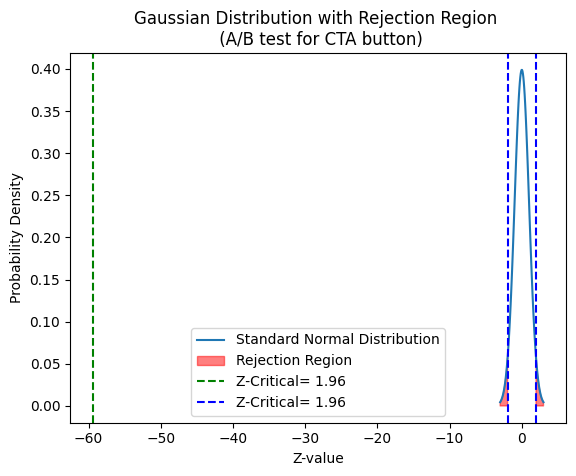

In [ ]:
#Parameters for the standard normal distribution
mu = 0 #Mean
sigma = 1 #Standard desviation
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) #Range of values
y = norm.pdf(x, mu, sigma) #Probability density

#plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

#Shade the rejection region for two-tailed test
plt.fill_between(x, y, where=(x > Z_critical) | (x < -Z_critical), color='red', alpha=0.5, label="Rejection Region")

#Adding Test Statistic
plt.axvline(x=Test_stat, color='green', linestyle='--', label=f'Z-Critical= {Z_critical:.2f}')

#Adding Z-critical value
plt.axvline(Z_critical, color='blue', linestyle='--', label=f'Z-Critical= {Z_critical:.2f}')
plt.axvline(-Z_critical, color='blue', linestyle='--')

#Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B test for CTA button)')
plt.legend()
#plt.grid(True)

#Show plot
plt.show()

# Calculating the Confidence Interval

In [ ]:
#Calculate the confidence Interval CI for A 2-sample Z-test
#Calculate the lower and upper bounds of Confidence Interval

CI =[round((p_hat_exp - p_hat_con) - SE*Z_critical, 3), #Lower bound of the CI, rounded to 3 decimal places
     round((p_hat_exp - p_hat_con) + SE*Z_critical, 3) #upper bound of the CI, rounded to 3 decimal places
     ]

#Print the calculated confidence interval
print("Confidence Interval of the 2 sample Z-test is: ", CI)


Confidence Interval of the 2 sample Z-test is:  [0.399, 0.426]


# Testing for Pratical Significance in A/B Testing

In [ ]:
def is_practical_significance(delta, CI_95):
  """We assess whether there is practical significance between Control and Experimental group using the Minimum Detectable  effect (MDE) based on the delta and CI_95.

  Arguments:
  - delta (float): the Minum Detectable Effect (MDE) considered for pratical significance.
  - CI_95 (Tuple): A tuple representing the lower and upper bounds of the 95% confidence interval.

  Returns:
  - Prints whether the experiment has a practical significance based on the MDE and CI.
  """
  # Extract lower bound of 95% Confidence Interval
  lower_bound_CI = CI_95[0]

  #Check if the lower bound of the CI is greater than or equal to delta
  if delta >= lower_bound_CI:
    print(f"We have pratical significance! \nWith MDE of {delta}, the diference between Control and Experimental is pratically significance")
    return True
  else:
    print(f"We do not have pratical significance! \nWith MDE of {delta}, the diference between Control and Experimental is not pratically significance")
    return False

#Example of using function:
delta = 0.1
CI_95 = (-0.04, 0.06)

#Call the function
Significance = is_practical_significance(delta, CI_95)
print("Lower bound of 95% confidence interval is: ", CI_95[0])
print("MDE is : ", delta ,"= 10%")

We have pratical significance! 
With MDE of 0.1, the diference between Control and Experimental is pratically significance
Lower bound of 95% confidence interval is:  -0.04
MDE is :  0.1 = 10%
